<a href="https://colab.research.google.com/github/UserDs/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import datetime as dt
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv")

### Data Inspection

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [7]:
df["total_of_special_requests"].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.isnull().sum() / len(df.index)*100
# We can see that columns "agent" and "company" are having 13% and 94% null values respectively.
 

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as company). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove features with 30% or less Non NaN values.

# Null values treatment 

In [ ]:
# Deleting "company" & "agent" columns as they are having high proportion of empty cells
df=df.drop(['company', 'agent'],axis=1)

# Deleting rows with NULL values corresponding to columns "children" & "country" as the percentage of empty cells in these columns are very less.
df = df.dropna(subset=['children', 'country'], axis = 0) # We delete rows with empty cells

In [ ]:
# Outliers Detection

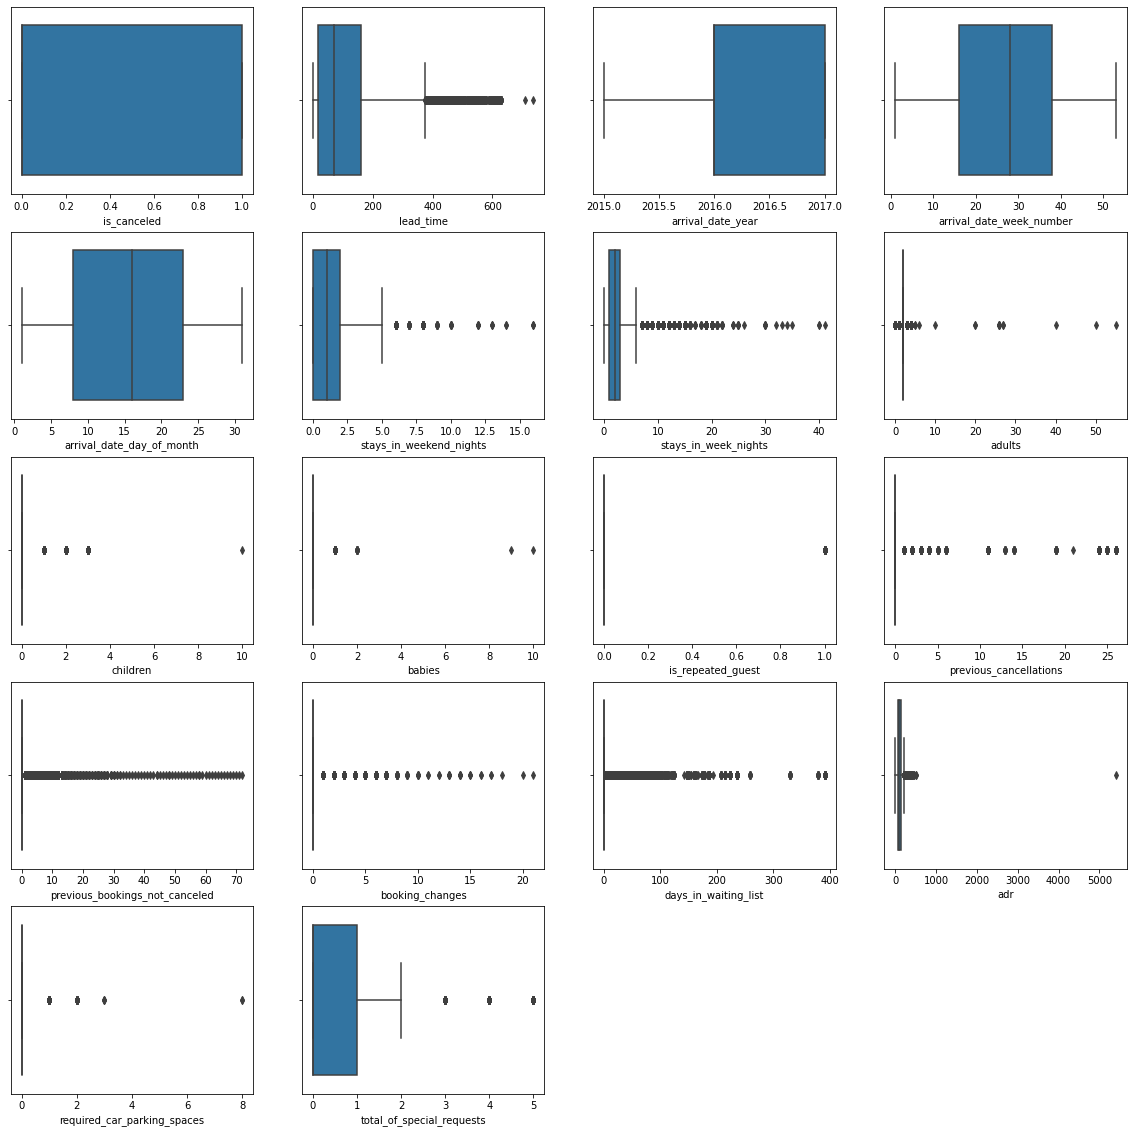

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(5,4,1)
sns.boxplot(x=df.is_canceled)
plt.subplot(5,4,2)
sns.boxplot(x=df.lead_time)
plt.subplot(5,4,3)
sns.boxplot(x=df.arrival_date_year)
plt.subplot(5,4,4)
sns.boxplot(x=df.arrival_date_week_number)
plt.subplot(5,4,5)
sns.boxplot(x=df.arrival_date_day_of_month)
plt.subplot(5,4,6)
sns.boxplot(x=df.stays_in_weekend_nights)
plt.subplot(5,4,7)
sns.boxplot(x=df.stays_in_week_nights)
plt.subplot(5,4,8)
sns.boxplot(x=df.adults)
plt.subplot(5,4,9)
sns.boxplot(x=df.children)
plt.subplot(5,4,10)
sns.boxplot(x=df.babies)
plt.subplot(5,4,11)
sns.boxplot(x=df.is_repeated_guest)
plt.subplot(5,4,12)
sns.boxplot(x=df.previous_cancellations)
plt.subplot(5,4,13)
sns.boxplot(x=df.previous_bookings_not_canceled)
plt.subplot(5,4,14)
sns.boxplot(x=df.booking_changes)
plt.subplot(5,4,15)
sns.boxplot(x=df.days_in_waiting_list)
plt.subplot(5,4,16)
sns.boxplot(x=df.adr)
plt.subplot(5,4,17)
sns.boxplot(x=df.required_car_parking_spaces)
plt.subplot(5,4,18)
sns.boxplot(x=df.total_of_special_requests)
plt.show()

# Outliers treatment 

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
df_num.columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Removing the outliers

columns_list = ['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

print("Dataset size before outliers removal: ", len(df.index))

for col in columns_list:
  highest_allowed = df[col].mean() + 3*df[col].std()
  lowest_allowed = df[col].mean() - 3*df[col].std()

  condition = (df[col] > lowest_allowed) & (df[col] < highest_allowed)


  df = df[condition]

  # print("Feature" + col + "had", len(df.index), "outliers")
  print(f"Datasize after removing outliers from feature {col} is {len(df.index)}")

print("Dataset size after outliers removal: ", len(df.index))

Dataset size before outliers removal:  118898
Datasize after removing outliers from feature lead_time is 117444
Datasize after removing outliers from feature stays_in_weekend_nights is 115255
Datasize after removing outliers from feature stays_in_week_nights is 113668
Datasize after removing outliers from feature adults is 113224
Datasize after removing outliers from feature children is 109878
Datasize after removing outliers from feature babies is 109028
Datasize after removing outliers from feature previous_cancellations is 108712
Datasize after removing outliers from feature previous_bookings_not_canceled is 107758
Datasize after removing outliers from feature booking_changes is 106476
Datasize after removing outliers from feature adr is 105601
Datasize after removing outliers from feature required_car_parking_spaces is 99617
Datasize after removing outliers from feature total_of_special_requests is 97553
Dataset size after outliers removal:  97553


In [ ]:
df["total_of_special_requests"].value_counts()

0    60456
1    26991
2    10106
Name: total_of_special_requests, dtype: int64

# Exploratory Data Analysis

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97553 entries, 2 to 119388
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           97553 non-null  object 
 1   is_canceled                     97553 non-null  int64  
 2   lead_time                       97553 non-null  int64  
 3   arrival_date_year               97553 non-null  int64  
 4   arrival_date_month              97553 non-null  object 
 5   arrival_date_week_number        97553 non-null  int64  
 6   arrival_date_day_of_month       97553 non-null  int64  
 7   stays_in_weekend_nights         97553 non-null  int64  
 8   stays_in_week_nights            97553 non-null  int64  
 9   adults                          97553 non-null  int64  
 10  children                        97553 non-null  float64
 11  babies                          97553 non-null  int64  
 12  meal                           

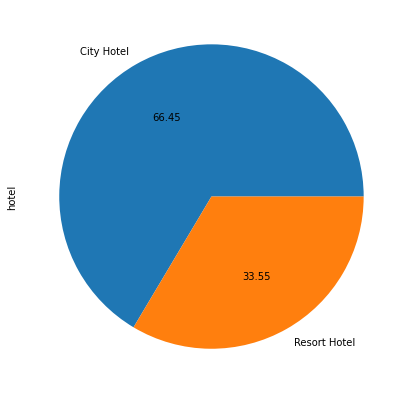

In [21]:
# Checking the percentage of City and Resort Hotels
df['hotel'].value_counts(normalize=True).plot(figsize = (7, 7), kind='pie', autopct="%.2f")

In [ ]:
df['kids'] = df.children + df.babies

# Combine total members by adding kids and adults
df['total_members'] = df.kids + df.adults

# convert the datatypes to string
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

In [ ]:
# confirmed bookings
confirmed_bookings = df[df.is_canceled=='0']

confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

# Highest confirmed bookings occured in months like "July" and "August" and In the starting and towards the end of year, the confirmed bookings are comparatively low

1     3184
2     4305
3     5454
4     5273
5     5752
6     4932
7     5742
8     6008
9     5129
10    5725
11    3758
12    3371
Name: arrival_date_month, dtype: int64

In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

# we have a 39% of cancelations.

Total Bookings cancelled
0    58633
1    38920
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.601037
1    0.398963
Name: is_canceled, dtype: float64


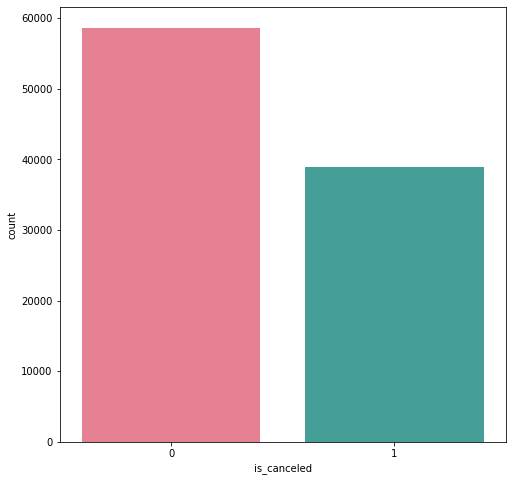

In [ ]:
# Canceled bookings

plt.figure(figsize=(8,8))

#Canceled=1, Not canceled= 0
sns.countplot(df['is_canceled'], palette='husl')
plt.show()

#

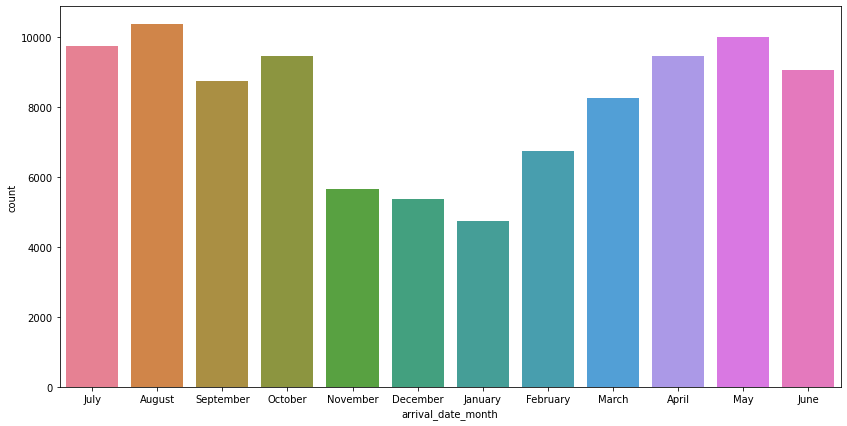

In [ ]:
# Month
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'], palette='husl')
plt.show()

# Highest bookings occured in months like "July" and "August" and in it comparatively low in "November", "December" and "January". Then it start increasing January onwards.

In [ ]:
# Market segment
df.market_segment.value_counts(normalize=True)

Online TA        0.464650
Offline TA/TO    0.218548
Groups           0.182670
Direct           0.088495
Corporate        0.038728
Complementary    0.004900
Aviation         0.002009
Name: market_segment, dtype: float64

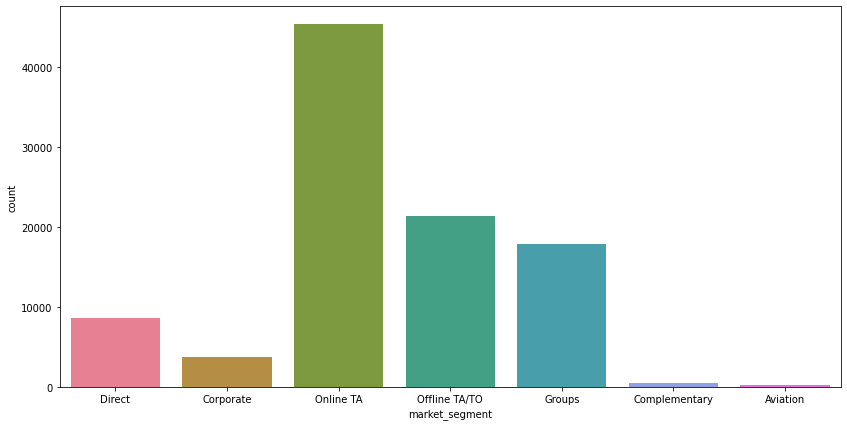

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'], palette='husl')
plt.show()

# Top market_segments are Online TA (46%), Offline TA/TO (21%) and Groups (18%).

In [ ]:
# Year
df.arrival_date_year.value_counts(normalize=True)

# Among all three years, 2016 is having the highest no. of bookings (47%).

2016    0.475106
2017    0.333214
2015    0.191680
Name: arrival_date_year, dtype: float64

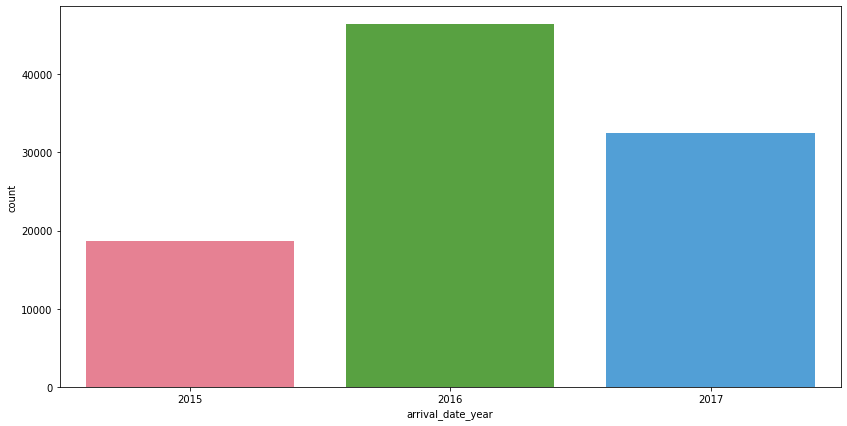

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_year'], palette='husl')
plt.show()

In [ ]:
# Meal
df.meal.value_counts(normalize=True)

# "BB" meal was selected in 76% of the bookings. Second and third highest selected meal types are HB (11%) and SC (10%).

BB           0.768382
HB           0.114358
SC           0.100489
Undefined    0.010446
FB           0.006325
Name: meal, dtype: float64

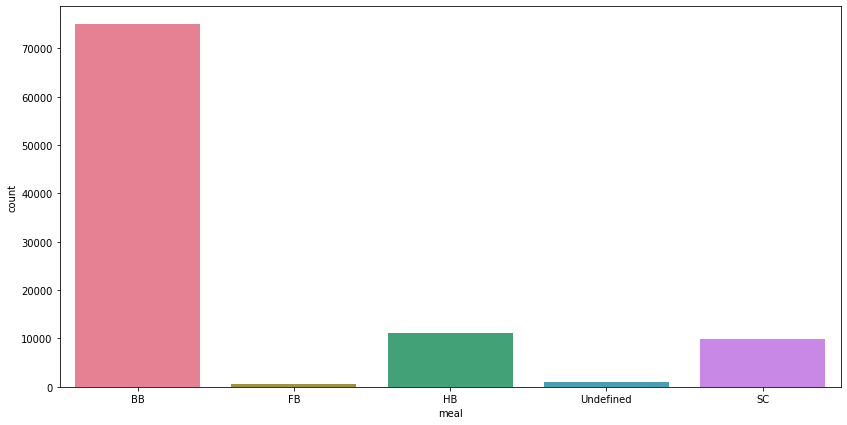

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['meal'], palette='husl')
plt.show()

In [ ]:
# Customer Type
df.customer_type.value_counts(normalize=True)

Transient          0.735057
Transient-Party    0.229516
Contract           0.031040
Group              0.004387
Name: customer_type, dtype: float64

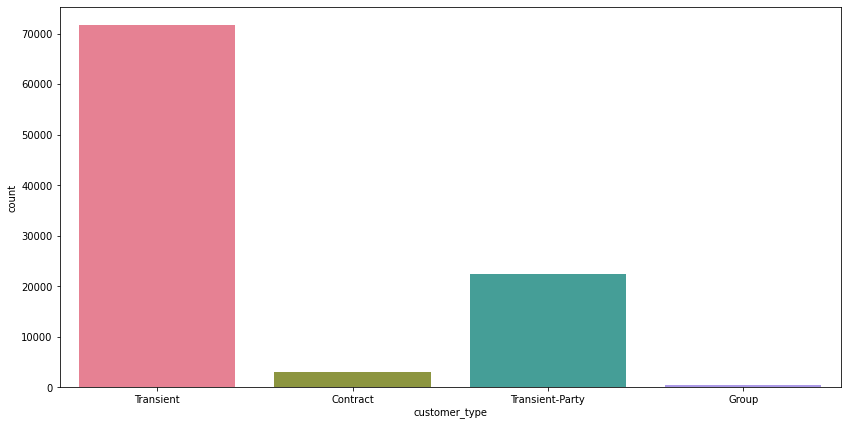

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='husl')
plt.show()

In [ ]:
# Reserved Room type
df.reserved_room_type.value_counts(normalize=True)

A    0.768505
D    0.160846
E    0.044027
F    0.009851
B    0.007370
G    0.004695
H    0.002460
C    0.002194
L    0.000051
Name: reserved_room_type, dtype: float64

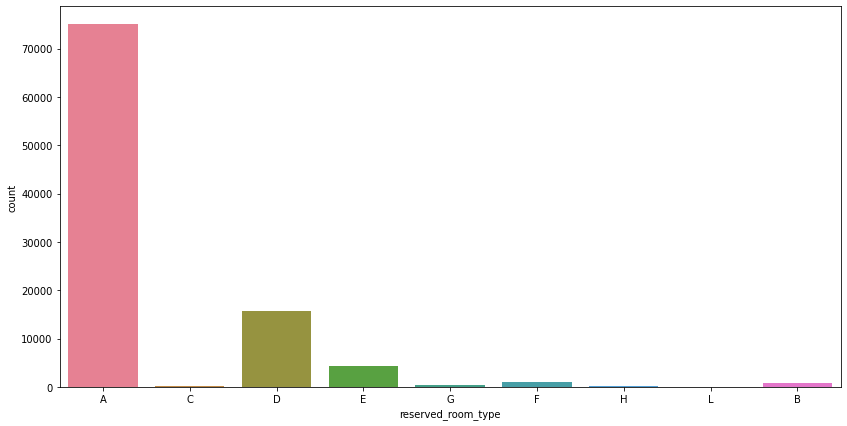

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

In [ ]:
# Assigned Room type
df.assigned_room_type.value_counts(normalize=True)

A    0.671122
D    0.212326
E    0.055006
B    0.017191
F    0.016494
C    0.013203
G    0.007432
H    0.003157
I    0.002378
K    0.001681
L    0.000010
Name: assigned_room_type, dtype: float64

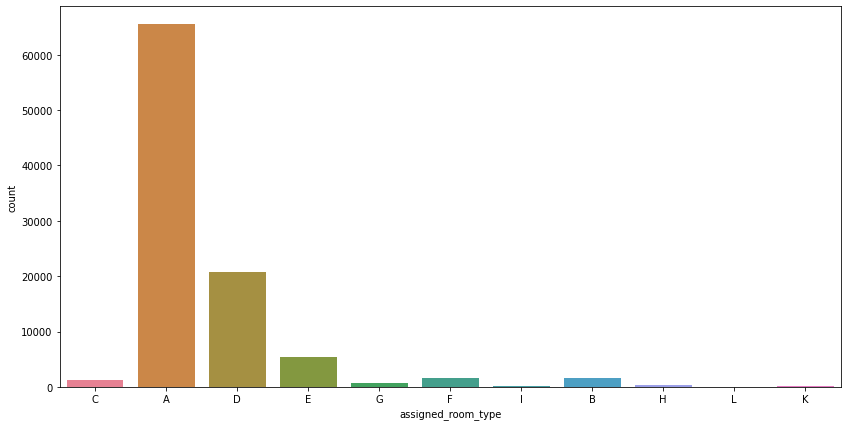

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()

In [ ]:
# Booking Changes
df.booking_changes.value_counts(normalize=True)

0    0.873566
1    0.098152
2    0.028282
Name: booking_changes, dtype: float64

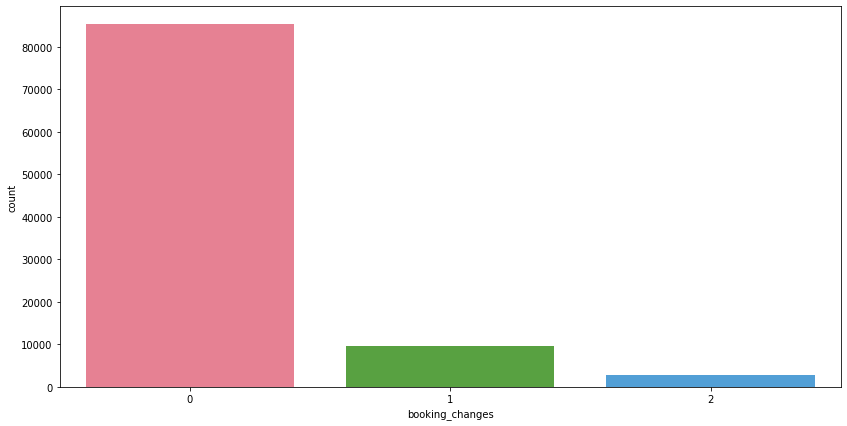

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='husl')
plt.show()

In [ ]:
# Distribution Channel
df.distribution_channel.value_counts(normalize=True)

# Channel TA/TO is consisting of 84% of the total bookings

TA/TO        0.842168
Direct       0.105778
Corporate    0.050106
GDS          0.001948
Name: distribution_channel, dtype: float64

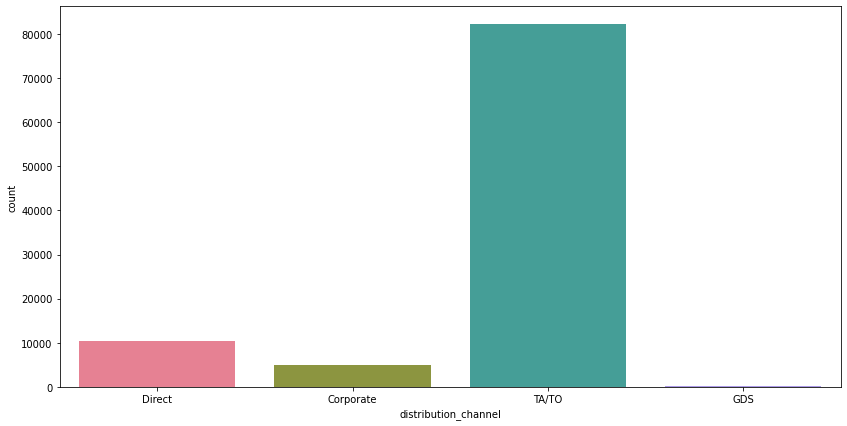

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['distribution_channel'], palette='husl')
plt.show()

In [ ]:
# Repeated Guest
df.is_repeated_guest.value_counts(normalize=True)

# Most of the guests (98%) are repeated.

0    0.978043
1    0.021957
Name: is_repeated_guest, dtype: float64

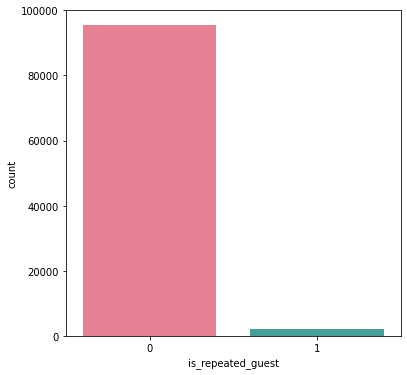

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['is_repeated_guest'], palette='husl')
plt.show()

In [ ]:
# Deposit Type

df.deposit_type.value_counts(normalize=True)

No Deposit    0.861767
Non Refund    0.136879
Refundable    0.001353
Name: deposit_type, dtype: float64

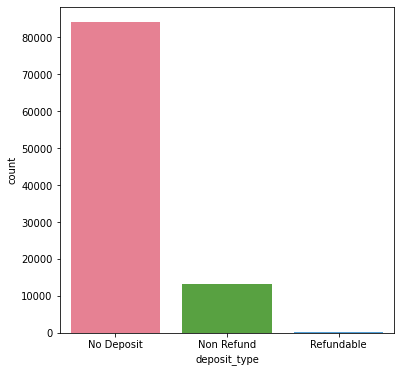

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

In [ ]:
# Required Car Parking Spaces
df.required_car_parking_spaces.value_counts(normalize=True)

0    1.0
Name: required_car_parking_spaces, dtype: float64

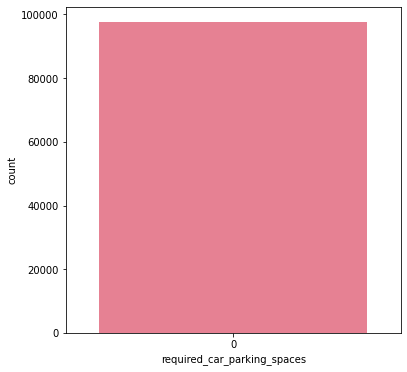

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

In [ ]:
# Total Members
df.total_members.value_counts(normalize=True)

# 72% of the bookings had 2 members.

2.0    0.720870
1.0    0.197411
3.0    0.079147
4.0    0.002573
Name: total_members, dtype: float64

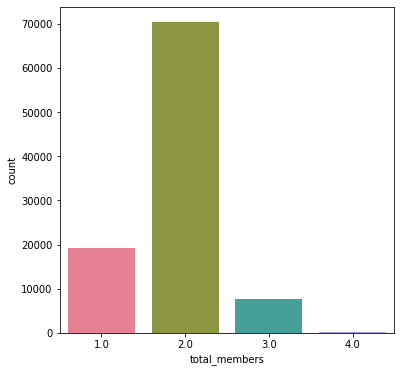

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['total_members'], palette='husl')
plt.show()

In [ ]:
# Reservation Status
df.reservation_status.value_counts(normalize=True)

Check-Out    0.601037
Canceled     0.388558
No-Show      0.010405
Name: reservation_status, dtype: float64

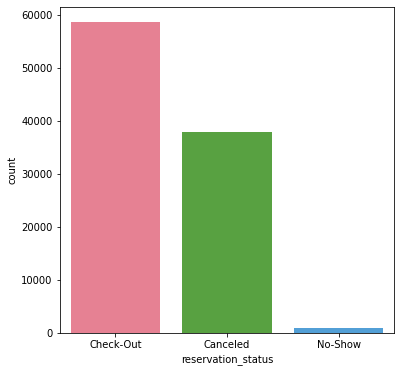

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()

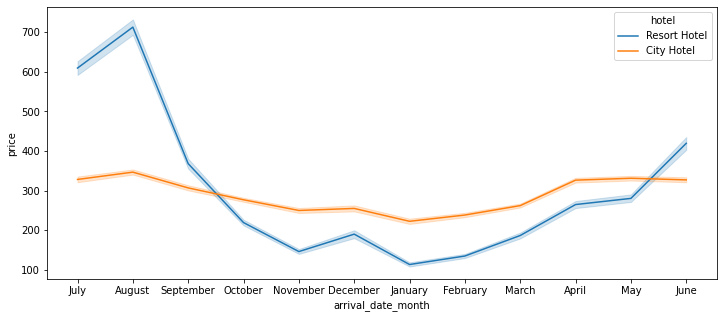

In [ ]:
# Relation between prices and month
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()


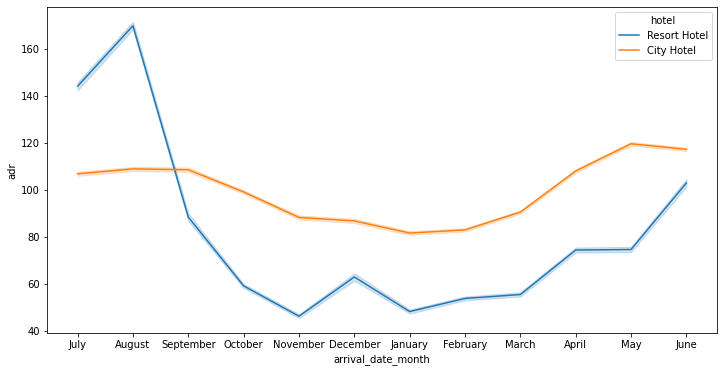

In [ ]:
# Average Daily Rate (ADR)

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

In [ ]:
# Which are the three most common and uncommon countries of origin?
print('Most common countries:')
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))


Most common countries:
PRT    40288
GBR     9375
FRA     8845
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
KNA    2
LAO    2
SLE    1
DMA    1
PYF    1
GUY    1
LCA    1
RWA    1
KIR    1
ATF    1
COM    1
ASM    1
SDN    1
MRT    1
STP    1
NCL    1
BDI    1
SYR    1
NAM    1
HND    1
NIC    1
SMR    1
VGB    1
CYM    1
BHS    1
NPL    1
MDG    1
UMI    1
MYT    1
MMR    1
PLW    1
BFA    1
ZMB    1
MLI    1
FRO    1
Name: country, dtype: int64


In [ ]:
# Inferences and Conclusion

# The majority of guests come from western europe countries.
# the majority of reservations are for city hotels.
# The number of repeated guests is too low.
# The majority of reservations converts into successful transactions.

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1


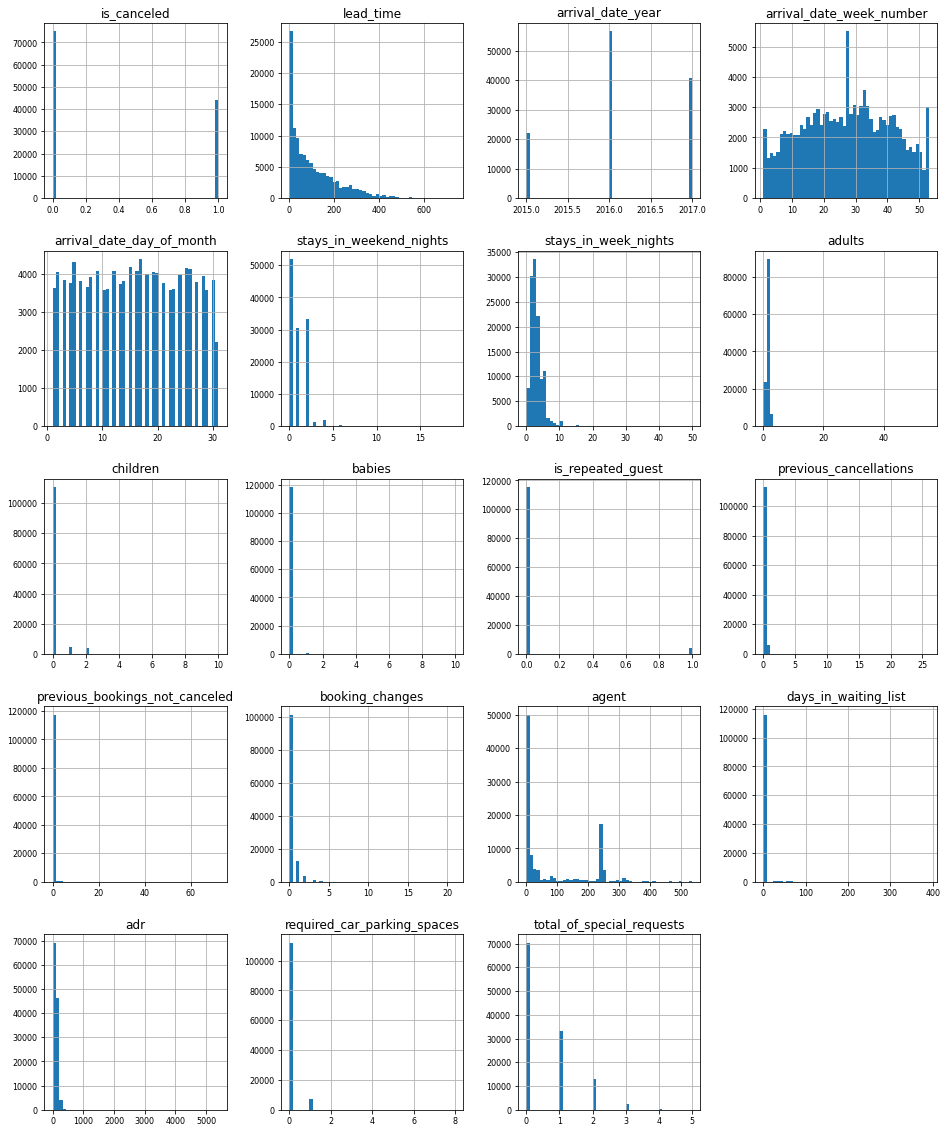

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
df_num.columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Outliers Detection


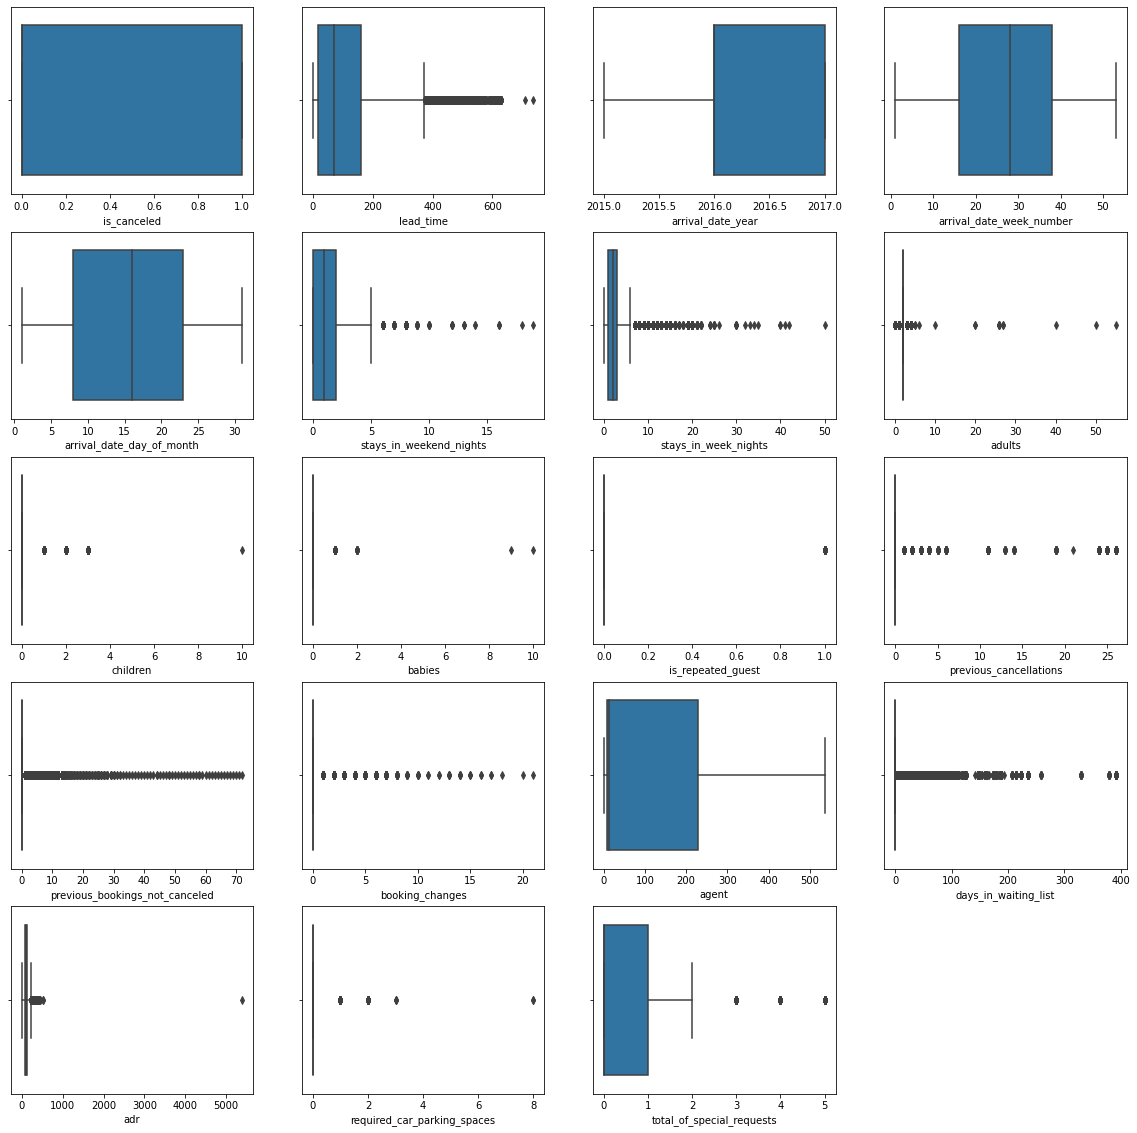

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(5,4,1)
sns.boxplot(x=df.is_canceled)
plt.subplot(5,4,2)
sns.boxplot(x=df.lead_time)
plt.subplot(5,4,3)
sns.boxplot(x=df.arrival_date_year)
plt.subplot(5,4,4)
sns.boxplot(x=df.arrival_date_week_number)
plt.subplot(5,4,5)
sns.boxplot(x=df.arrival_date_day_of_month)
plt.subplot(5,4,6)
sns.boxplot(x=df.stays_in_weekend_nights)
plt.subplot(5,4,7)
sns.boxplot(x=df.stays_in_week_nights)
plt.subplot(5,4,8)
sns.boxplot(x=df.adults)
plt.subplot(5,4,9)
sns.boxplot(x=df.children)
plt.subplot(5,4,10)
sns.boxplot(x=df.babies)
plt.subplot(5,4,11)
sns.boxplot(x=df.is_repeated_guest)
plt.subplot(5,4,12)
sns.boxplot(x=df.previous_cancellations)
plt.subplot(5,4,13)
sns.boxplot(x=df.previous_bookings_not_canceled)
plt.subplot(5,4,14)
sns.boxplot(x=df.booking_changes)
plt.subplot(5,4,15)
sns.boxplot(x=df.agent)
plt.subplot(5,4,16)
sns.boxplot(x=df.days_in_waiting_list)
plt.subplot(5,4,17)
sns.boxplot(x=df.adr)
plt.subplot(5,4,18)
sns.boxplot(x=df.required_car_parking_spaces)
plt.subplot(5,4,19)
sns.boxplot(x=df.total_of_special_requests)
plt.show()

In [ ]:
# Correlation Analysis

In [ ]:
df_num_corr = df_num.corr()['total_of_special_requests'][:-1] # -1 because the latest row is total_of_special_requests
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with total_of_special_requests:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with total_of_special_requests:
Series([], Name: total_of_special_requests, dtype: float64)


No ferature is strongly correlated with the target variable total_of_special_requests.

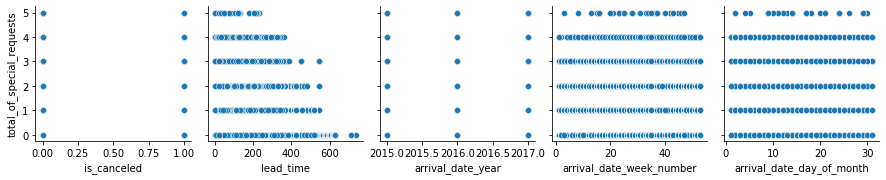

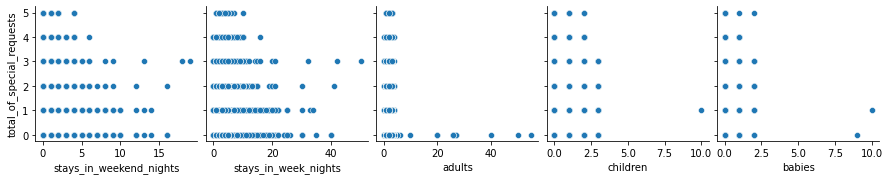

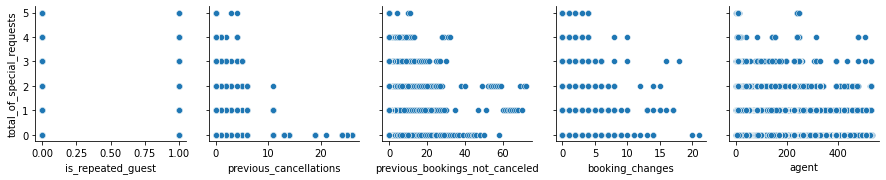

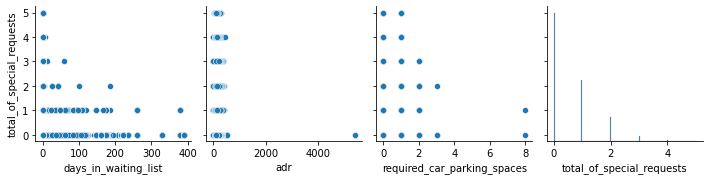

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['total_of_special_requests'])

In [ ]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

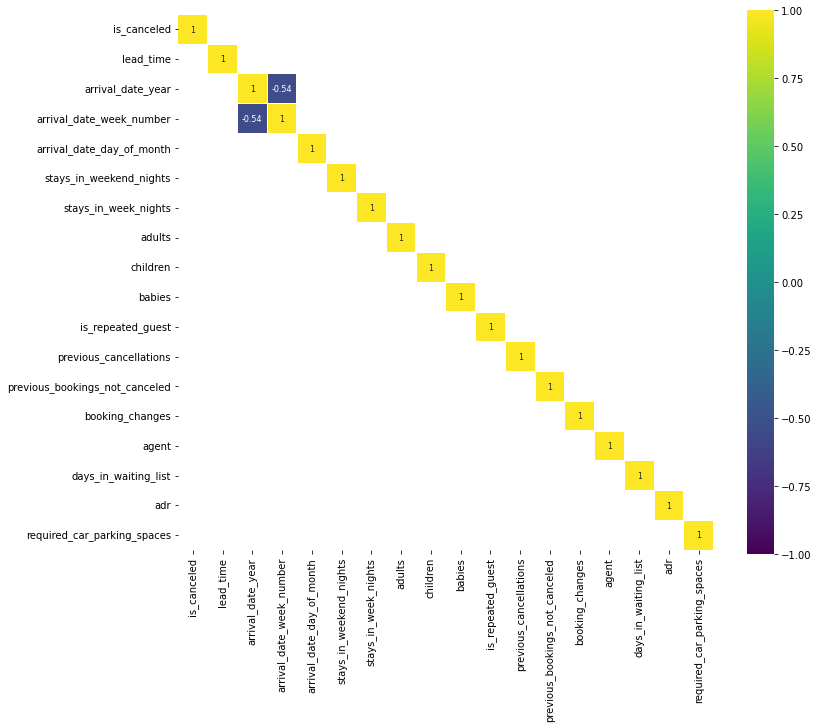

In [ ]:
corr = df_num.drop('total_of_special_requests', axis=1).corr() # We already examined total_of_special_requests correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

We can see that 'arrival_date_year' and 'arrival_date_week_number' are significantly correlated to each other.

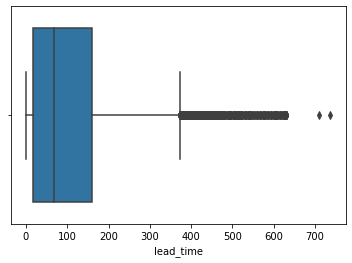

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.lead_time)

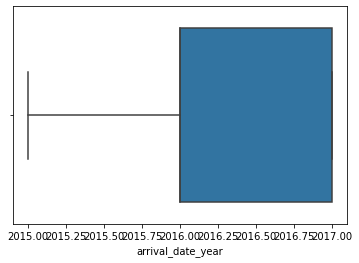

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.arrival_date_year)

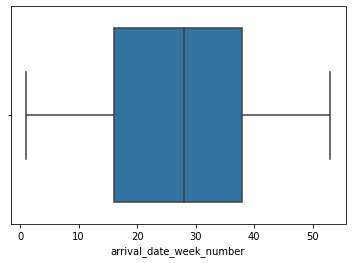

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.arrival_date_week_number)

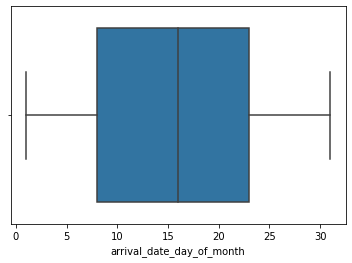

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.arrival_date_day_of_month)

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.lead_time)

In [ ]:
figsize=(12,8)
sns.boxplot(x=df.lead_time)

In [ ]:
df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [ ]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

In [ ]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

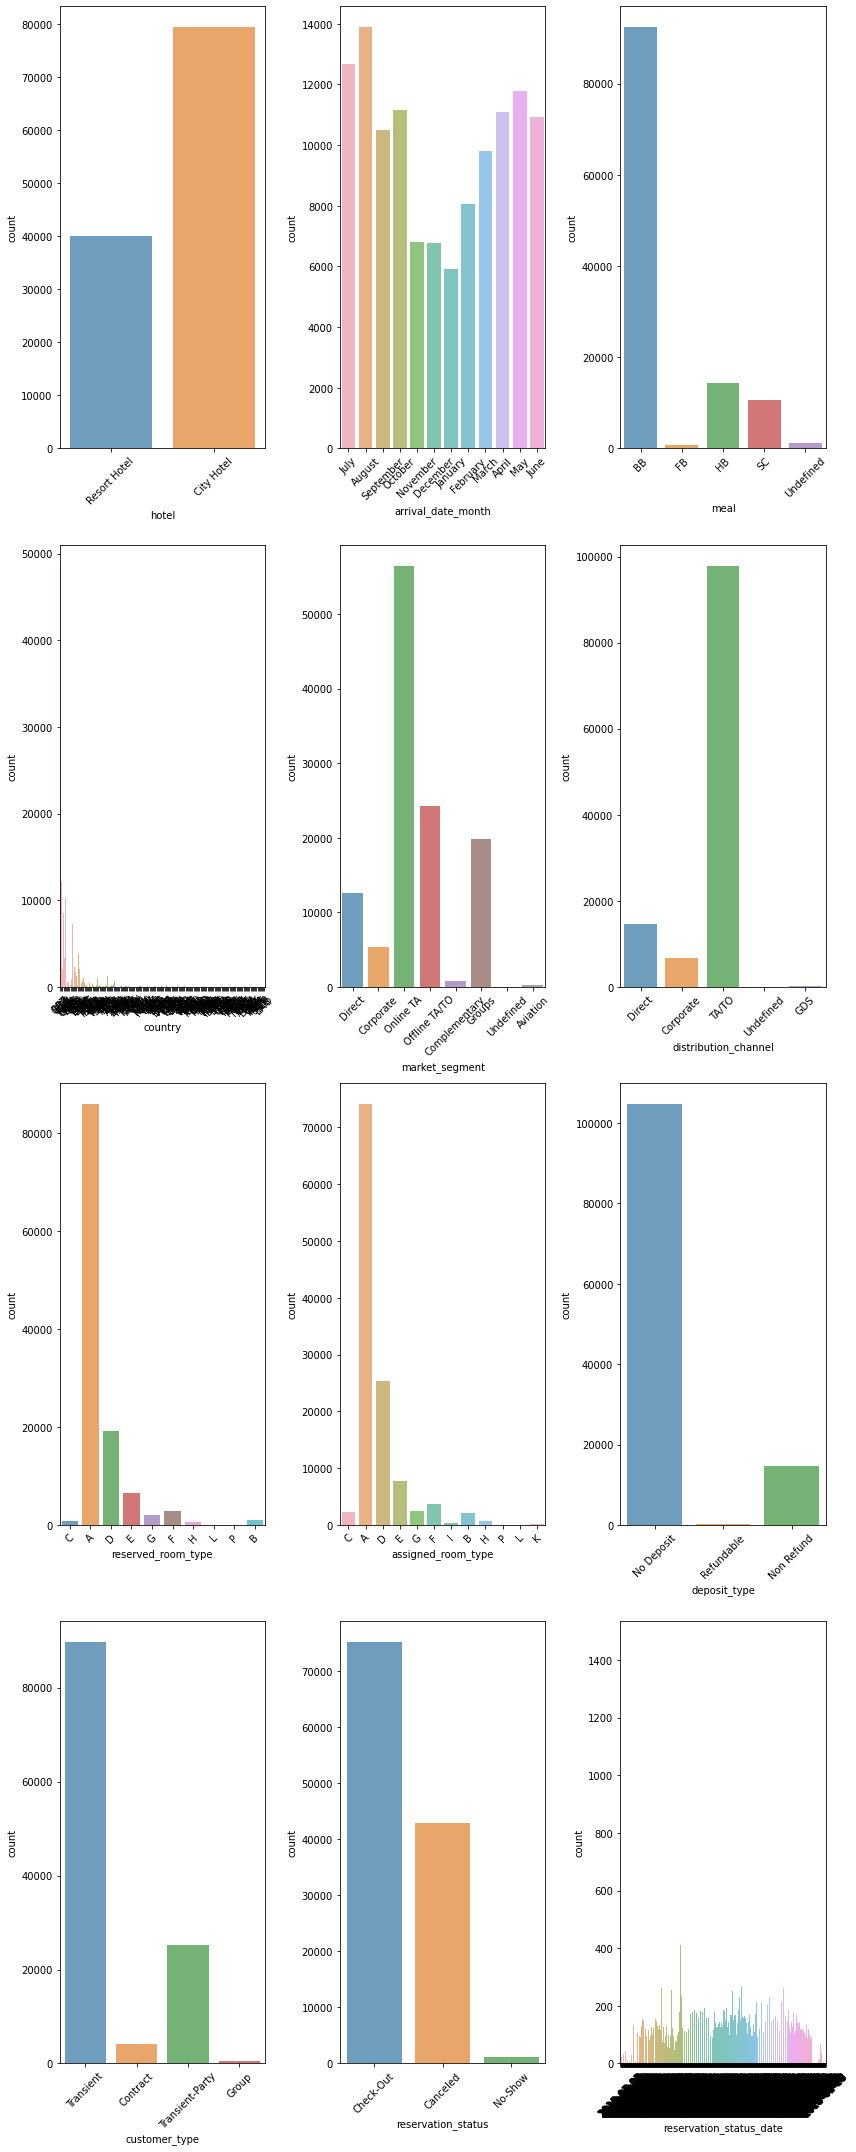

In [ ]:
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

In [ ]:
# EDA V2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv")

### Data Inspection

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as company). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove features with 30% or less Non NaN values.

In [ ]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

print("List of dropped columns:", end=" ")

for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: company, 



In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
df["children"].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
# import modules
from sklearn.impute import SimpleImputer
 
# defining the imputer
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='most_frequent')
 
# transform the dataset
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.4,0,0,Check-Out,2017-09-07
